## Initialization

In [1]:
import unet, imageGeneration

Using TensorFlow backend.


#Create your network architecture
Generates 1000 training images and 30 test images together with labels

In [2]:
model = unet.create_unet()

## Create your batch

In [3]:
import numpy as np
from skimage import io
from matplotlib import pyplot as plt
import imageio

imsize = (129,129,1)
xbatch = np.zeros((1000, 144, 144, 1))
ybatch = np.zeros((1000, 144, 144, 1))
padding_tuple = imageGeneration.get_padding(imsize[0:4], 4)


for i in range(1000):
    xdata = np.zeros(imsize)
    ydata = np.zeros(imsize)
    xdata[:,:,0] = imageio.imread('data/particles/train/image/' + str(i) + '.png') / 255
    xdata = np.pad(xdata,padding_tuple  + ((0,0),))
    if(i==0):
        plt.imshow(xdata[:,:,0], cmap='gray')
        plt.show()
    ydata[:,:,0] = imageio.imread('data/particles/train/label/' + str(i) + '.png') / 255
    ydata = np.pad(ydata,padding_tuple  + ((0,0),))
    xbatch[i,:,:,:] = xdata
    ybatch[i,:,:,:] = ydata

FileNotFoundError: No such file: 'C:\Users\fredr\Dropbox\kand\DeepTrack 1.0\data\particles\train\image\0.png'

## Trains the network on 100 epochs and saves the best results

In [9]:
from keras.callbacks import ModelCheckpoint
model_checkpoint = ModelCheckpoint('unet_particle.hdf5', monitor='loss',verbose=1, save_best_only=True)
model.fit(xbatch,ybatch, epochs = 100, callbacks = [model_checkpoint])


Epoch 1/100
1000/1000 [==============================] - 4s 4ms/step - loss: 0.5747 - accuracy: 0.9652

Epoch 00001: loss improved from inf to 0.57470, saving model to unet_particle.hdf5
Epoch 2/100
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0821 - accuracy: 0.9960: 0s - loss: 0.0879 - accu

Epoch 00002: loss improved from 0.57470 to 0.08206, saving model to unet_particle.hdf5
Epoch 3/100
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0340 - accuracy: 0.9966

Epoch 00003: loss improved from 0.08206 to 0.03399, saving model to unet_particle.hdf5
Epoch 4/100
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0289 - accuracy: 0.9966

Epoch 00004: loss improved from 0.03399 to 0.02886, saving model to unet_particle.hdf5
Epoch 5/100
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0279 - accuracy: 0.9966

Epoch 00005: loss improved from 0.02886 to 0.02791, saving model to unet_particle.hdf5
Epoch 6/100
1000/1000 [

Epoch 88/100
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0034 - accuracy: 0.9988

Epoch 00088: loss improved from 0.00342 to 0.00342, saving model to unet_particle.hdf5
Epoch 89/100
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0034 - accuracy: 0.9988

Epoch 00089: loss improved from 0.00342 to 0.00342, saving model to unet_particle.hdf5
Epoch 90/100
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0034 - accuracy: 0.9988

Epoch 00090: loss improved from 0.00342 to 0.00339, saving model to unet_particle.hdf5
Epoch 91/100
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0034 - accuracy: 0.9988

Epoch 00091: loss did not improve from 0.00339
Epoch 92/100
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0034 - accuracy: 0.9988

Epoch 00092: loss improved from 0.00339 to 0.00337, saving model to unet_particle.hdf5
Epoch 93/100
1000/1000 [==============================] - 3s 3ms/step - loss: 0.

## Trains the network using a generator

In [4]:
image_parameters_function = lambda : imageGeneration.get_image_parameters_optimized()
from keras.callbacks import ModelCheckpoint
### Define image generator
        
imggen = imageGeneration.batch_generator(image_parameters_function, 500)
        
model_checkpoint = ModelCheckpoint('unet_particle.hdf5', monitor='loss',verbose=1, save_best_only=True)

iteration = 0
for image_batch, target_batch in imggen:
    if(iteration>=50):
        break
    iteration+=1

    model.fit(image_batch, target_batch, epochs = 50, callbacks = [model_checkpoint])
    print("Iteration is " + str(iteration))

AttributeError: module 'imageGeneration' has no attribute 'batch_generator'

## Tests the network on the movie

In [10]:
import numpy as np
from skimage import io
from matplotlib import pyplot as plt
import cv2

im = io.imread('bild.tif')/255
print(im.shape)


batch = np.zeros(im.shape+(1,))
batch[:,:,:,0] = im
batch = np.pad(batch, ((0,0),(4,4),(0,0),(0,0)))
print(batch.shape)
model = unet.create_unet()
model.load_weights("unet_particle.hdf5")
A = model.predict(batch)
print(A.shape)
#Shows the first 10 images
for j in range(2):
    labelimage = A[j, :, :, 0]
    image = im[j]
    cv2.imwrite("data\particles\movie\label\label" + str(j) + '.png', labelimage*255)
    cv2.imwrite("data\particles\movie\frame\frame" + str(j) + ".png", im*255)


(1000, 312, 512)
(1000, 320, 512, 1)
(1000, 320, 512, 1)


error: OpenCV(4.1.2) C:\projects\opencv-python\opencv\modules\imgcodecs\src\loadsave.cpp:668: error: (-215:Assertion failed) image.channels() == 1 || image.channels() == 3 || image.channels() == 4 in function 'cv::imwrite_'


## Tests the network on the movie

KeyboardInterrupt: 

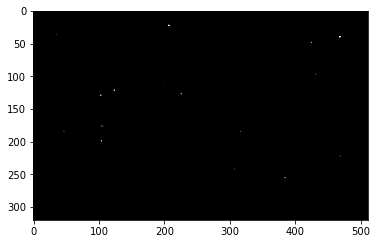

In [16]:
import numpy as np
from skimage import io
from matplotlib import pyplot as plt
import cv2

#Shows the first 10 images
for j in range(1000):
    labelimage = A[j, :, :, 0]
    image = im[j]
    plt.imshow(image, cmap='gray')
    plt.savefig("data/particles/movie/frame/frame" + str(j) + ".png")
    plt.imshow(labelimage, cmap='gray')
    plt.savefig("data/particles/movie/label/label" + str(j) + ".png")

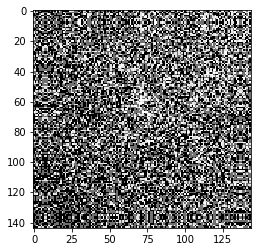

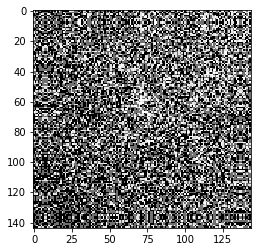

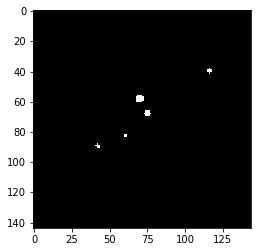

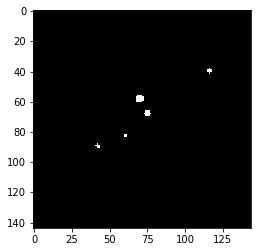

In [5]:
import imageio
from matplotlib import pyplot as plt
import imageGeneration

i = 16

im = imageio.imread('data/particles/train/image/' + str(i) + '.png') / 255
plt.imshow(im, cmap='gray')
plt.show()
im = imageGeneration.get_image_with_padding(im)
plt.imshow(im, cmap='gray')
plt.show()

im = imageio.imread('data/particles/train/label/' + str(i) + '.png') / 255
plt.imshow(im, cmap='gray')
plt.show()
im = imageGeneration.get_image_with_padding(im)
plt.imshow(im, cmap='gray')
plt.show()